In [1]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
1.19.2
1.1.3


In [2]:
# Load PIRUS Data
pirus = pd.read_csv('../data/clean_data/pirus_deep_clean_Final.csv')

# Load PIRUS Codebook
with open('../data/clean_data/pirus_codebook.json') as f:
    pirus_codebook = json.load(f)

# Load Custom Color Map
cmap = ['#E7E3DF', '#3186A9', '#EEAD9A', '#DBB03B', '#66759A', '#EBD79F', '#83684C', '#6D6E72', '#965341', '#8F917F', '#010503']

In [3]:
# Incidents of Radicalization by Year and Gender

# Load relevant pirus columns into new DataFrame
gendered_radicalization = pirus[['gender', 'year']]

# Build gender function to map code names to codes
g_codes = pirus_codebook['gender']['codes']
g_fun = lambda x: g_codes[str(x)]

# Apply gender function (g_fun) to gender column
gendered_radicalization['gender'] = gendered_radicalization['gender'].apply(g_fun)

# Append a column of 1s 
gendered_radicalization['val'] = pd.Series([1 for i in range(len(gendered_radicalization.index))])

# Group df by gender and year
gendered_radicalization = gendered_radicalization.groupby(['gender','year'])

# For each group, sum the val column & convert group obj to DataFrame
gendered_radicalization = gendered_radicalization['val'].sum().to_frame(name = '# of instances').reset_index()

# Sort DataFrame
gendered_radicalization = gendered_radicalization.sort_values('year')

<ipython-input-3-92ad1e095c13>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gendered_radicalization['gender'] = gendered_radicalization['gender'].apply(g_fun)
<ipython-input-3-92ad1e095c13>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gendered_radicalization['val'] = pd.Series([1 for i in range(len(gendered_radicalization.index))])


Text(1996, 10, 'Female')

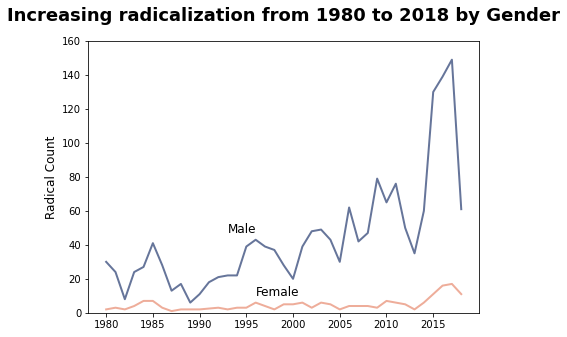

In [9]:
# Plot line graph
fig, ax = plt.subplots(figsize= [7, 5])

# Plot Men
male_radicals = gendered_radicalization.loc[gendered_radicalization['gender'] == 'Male']
male_radicals = male_radicals.set_index(male_radicals.year)
male_radicals.drop('year', axis = 1, inplace = True)

sns.lineplot(x = 'year', y = '# of instances', data = male_radicals, linewidth = 2, color = '#66759A')

# Plot Women
female_radicals = gendered_radicalization.loc[gendered_radicalization['gender'] == 'Female']
female_radicals = female_radicals.set_index(female_radicals.year)
female_radicals.drop('year', axis = 1, inplace = True)

sns.lineplot(x = 'year', y = '# of instances', data = female_radicals, linewidth = 2, color = '#EEAD9A')

# Set title
ax.set_title('Increasing radicalization from 1980 to 2018 by Gender', weight='bold',
             loc = 'center', pad = 20).set_fontsize('18')

# Set y axis
ax.set_ylabel(r"Radical Count", rotation='vertical', size = 12, weight='normal')

ax.set(ylim = (0,160))

# Set x axis 
ax.set_xlabel("")

# Add annotations
ax.annotate("Male", size = 12, weight = 'normal', xy = (1993, male_radicals['# of instances'][1993]), 
            xytext = (1993, male_radicals['# of instances'][1993]+25))

ax.annotate("Female", size = 12, weight = 'normal', xy = (1996, female_radicals['# of instances'][1996]), 
            xytext = (1996, female_radicals['# of instances'][1996]+4))

In [5]:
# Dictionary of violent codes
violence_codes = {1:'Violent',0:'Non Violent'}

# Isolate gender codes dictionary in pirus_codebook
gender_codes = pirus_codebook['gender']['codes']

# Capture data of interest in new Data Frame
gendered_violence = pd.DataFrame(pirus[['gender','violent', 'subject_id']])

# Drop rows with NaNs in violent 
gendered_violence = gendered_violence.dropna(subset=['violent'])

# Change numerical violent & gender values to coded ones
gendered_violence['violent'] = gendered_violence['violent'].apply(lambda x:violence_codes[int(x)])
gendered_violence['gender'] = gendered_violence['gender'].apply(lambda x:gender_codes[str(int(x))])

# Count subject_ids by violent & gender
gendered_violence = gendered_violence['subject_id'].groupby([gendered_violence['violent'], gendered_violence['gender']]).count().to_frame(name = "").unstack()
gendered_violence.index.names = [""]
gendered_violence.columns.name = ""

# Print results
print('# of Instances of Violent & Non Violent\nRadicals by Gender')
print(gendered_violence)


# of Instances of Violent & Non Violent
Radicals by Gender
                        
gender      Female  Male
                        
Non Violent    120   671
Violent         62  1051
